# WCS with astropy

Useful links:<br>
https://docs.astropy.org/en/stable/wcs/

In [1]:
# Imports
import matplotlib
matplotlib.use('nbagg')
import numpy as np
from matplotlib import pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord

In [2]:
# Get the example data
filename = 'data/M15_dss.fits'

In [3]:
# Get the first HDU with the header and data 
hdu = fits.open(filename)[0]

In [4]:
# Create the WCS object from the header
w = WCS(hdu.header)

In [5]:
w

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 320.5875833333333  10.216833333333334  
CRPIX : 7013.479250009395  -6471.725275089229  
PC1_1 PC1_2  : 0.015186969446473766  -1.8409775369215112e-05  
PC2_1 PC2_2  : 1.6489129475796757e-05  0.015187410568761286  
CDELT : -0.018647468649683085  0.018647468649683085  
NAXIS : 882  882

# Using the WCS object
You can easily convert from x/y pixel coordinates to world coordinate (e.g., RA and DEC) or vice versa.

wcs_pix2world() converts from pixel to world coordinates.<br>
wcs_world2pix() converts from world to pixel coordinates.

You have to give the "origin".  0 for 0-based for Numpy arrays, or 1 for 1-based such as FITS convention.

In [6]:
w.wcs_pix2world(30, 40, 0)

[array(322.61145498), array(12.05251977)]

In [7]:
w.wcs_world2pix(322.4, 12.2, 0)

[array(764.23343536), array(555.45086106)]

# Displaying images

<IPython.core.display.Javascript object>


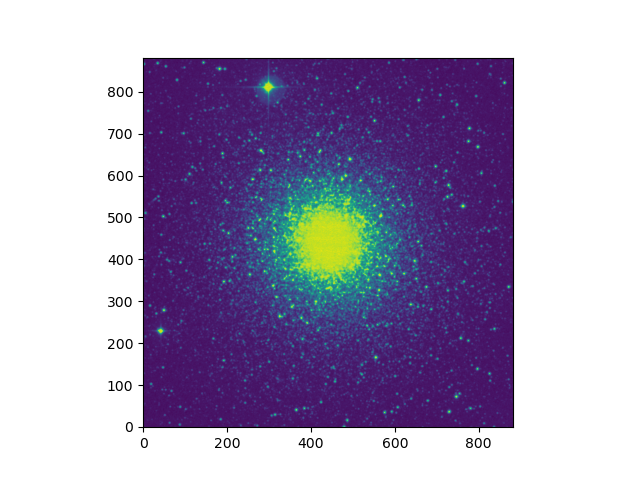

In [8]:
# Display the image with pixel coordinates
plt.imshow(hdu.data,origin='lower')
plt.show()

<IPython.core.display.Javascript object>


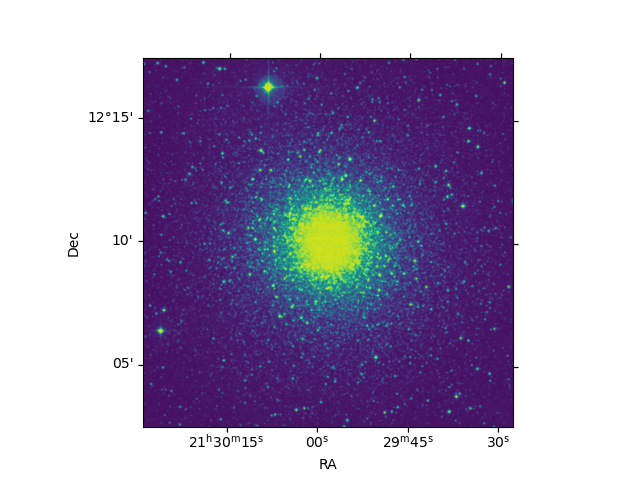

In [11]:
# Display the image with world coordinates
fig = plt.figure()
fig.add_subplot(111, projection=w)
plt.imshow(hdu.data, origin='lower', cmap=plt.cm.viridis)
plt.xlabel('RA')
plt.ylabel('Dec')
plt.show()

## Questions

**1) What is the X/Y pixel coordinate of the bright star in the top of the image?  Hint: use the zoom feature to get better accuracy.**

In [12]:
"300/810"

'300/810'

**2) Convert this to RA and DEC.**

In [13]:
"21h30m/12dec 16'30''"
world = w.wcs_pix2world(300, 810, 0)

print("Ra = {:.2f} deg, Dec = {:.2f} deg".format(world[0], world[1]))

Ra = 322.54 deg, Dec = 12.27 deg


**3) What are the pixel and world coordinates of the center of the M15 globular cluster?**

In [14]:
#pixel local:
pix = (440, 440)
print("x = {:.2f} deg, y = {:.2f} deg".format(*pix))

#world cords:
world2 = w.wcs_pix2world(*pix, 0)
print("Ra = {:.2f} deg, Dec = {:.2f} deg".format(*world2))

x = 440.00 deg, y = 440.00 deg
Ra = 322.49 deg, Dec = 12.17 deg


**4) Create a SkyCoord for the center of the cluster and get the galactic coordinates.**

In [15]:
center = SkyCoord(ra=world[0], dec=world[1], unit='deg')
cluster = SkyCoord(ra=world2[0], dec=world2[1], unit='deg')

print(center)
print(cluster)

<SkyCoord (ICRS): (ra, dec) in deg
    (322.53505771, 12.27111087)>
<SkyCoord (ICRS): (ra, dec) in deg
    (322.49365671, 12.16664858)>


**5) What is the field-of-view (in degrees) of this image?  Hint: use the coordinates of the corners.**

In [16]:
top_l = (0,0)
top_r = (882, 0)
bot_l = (882, 0)
bot_r = (882, 882)
corners = [top_l, top_r, bot_l, bot_r]

top_l = w.wcs_pix2world(*top_l, 0)
top_r = w.wcs_pix2world(*top_r, 0)
bot_l = w.wcs_pix2world(*bot_l, 0)

top_l_sky = SkyCoord(ra=top_l[0], dec=top_l[1], unit='deg')
top_r_sky = SkyCoord(ra=top_r[0], dec=top_r[1], unit='deg')
bot_l_sky = SkyCoord(ra=bot_l[0], dec=bot_l[1], unit='deg')

print(top_l_sky.separation(top_r_sky))
print(top_l_sky.separation(bot_l_sky))

0d14m59.0163s
0d14m59.0163s


**6) Modify the WCS object so that it points to RA=50.0, DEC=50.0 at the center of the image. Create a copy first with w2=w.deepcopy().  Replot it with the new WCS object to check that it changed the way you expected.**

<IPython.core.display.Javascript object>


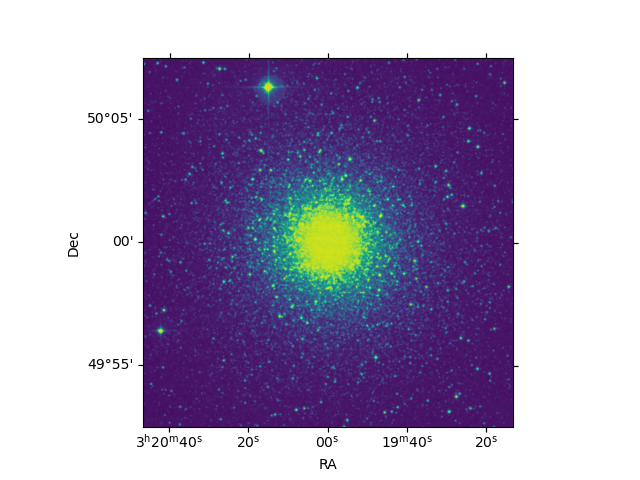

In [17]:
w2 = w.deepcopy()
w2.wcs.crpix = [882/2, 882/2]
w2.wcs.crval = [50,50]

# Display the image with world coordinates
fig = plt.figure()
fig.add_subplot(111, projection=w2)
plt.imshow(hdu.data, origin='lower', cmap=plt.cm.viridis)
plt.xlabel('RA')
plt.ylabel('Dec')
plt.show()

**7) Increase the pixel scale of the WCS object by a factor of 4. Create a copy first. Replot it with the new WCS object to check that it changed the way you expected.**

<IPython.core.display.Javascript object>


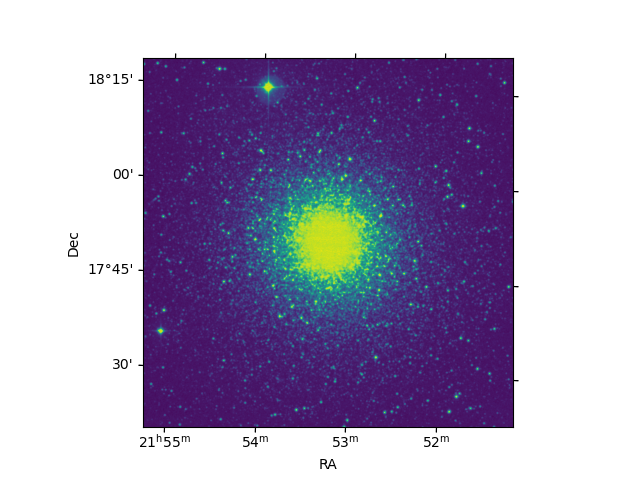

In [18]:
w3 = w.deepcopy()
w3.wcs.cdelt *= 4

# Display the image with world coordinates
fig = plt.figure()
fig.add_subplot(111, projection=w3)
plt.imshow(hdu.data, origin='lower', cmap=plt.cm.viridis)
plt.xlabel('RA')
plt.ylabel('Dec')
plt.show()

**8) Build a WCS TAN object by scratch for a 1000x1000 image, center at RA=45.0, DEC=-50.5, with a pixel scsale of 0.5" per pixel and no rotation.**

In [19]:
# Make a basic WCS object
w4 = WCS(naxis=2)
w4.wcs.ctype=['RA---TAN', 'DEC---TAN']
w4.wcs.crpix = [1000/2]*2
w4.pixel_shape = [1000]*2
w4.wcs.cdelt = [(0.5 / 3600)]*2
w4.wcs.crval = [45,-50.5]
print(w4)

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC---TAN'  
CRVAL : 45.0  -50.5  
CRPIX : 500.0  500.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 0.0001388888888888889  0.0001388888888888889  
NAXIS : 1000  1000


In [20]:
? WCS

In [21]:
np.ones((2,2))

array([[1., 1.],
       [1., 1.]])

# Lecture 5 answers

1. calculate the brightness ratio of two stars with a magnitude difference of 3.78
2. star B has a magnitude 4.95, and star A is 32.9 times brighteer than star B. Calculate the magnitude of star A.
3. Two nearby stars cannot be resolved (separated in a small telescope. Their magnitudes are 5.2 and 8.4. What will be the magnitude of the two stars seen as one?
4. what is the peak blackbody wavelength of a star temperature 4500K?
5. the distance modulus of a  galaxy is 34.5. What is it's distance?


In [ ]:
## Add astropy.units to these answers
import astropy.units as u

In [ ]:
# Question 1 ******
delta = 3.78
magdiff = 10**(delta/2.5)
print(f"magnitude ratio: {magdiff:.2f}")

In [ ]:
# Question 2
mag =  -2.5*np.log10(32.9) +4.95
print(f"magnitude of A: {mag:.2f}")

In [ ]:
# Question 3
m1 = 5.2
m2 = 8.4
M = m1-2.5*np.log10(1+10**((m1-m2)/2.5))
print(f"magnitude of of both stars as one: {M:.2f}")

In [ ]:
# Question 4
T = 4500 * u.K
lambda_max = (2.8979*(u.K*u.mm))/T
print(f"peak black body: {lambda_max.to(u.Angstrom):.4e}")

In [ ]:
# Question 5
mu = 34.5
d = 10**((1/5)*(mu+5))*u.pc
print(f"distance modulus: {d.to(u.Mpc):.3e}")

# Lecture 6 Questions
1. An eye has a pupil diameter of 7 mm. How much fainter can you see with a 10 inch diameter telescope and with the 42m diameter telescope? What is the difference in magnitudes?
2. Calculate the image scale of a telescope with a diameter of 500 mm and a focal ratio of 5 (give answer in arcsec/mm)?
3. What is the diffration limit for a 10 inch diameter telescope at 500nm?
4. Calculate the magnification of the telescope in #2 when used with an eyepiece of focal length 25 mm.

In [ ]:
#Question 1
#the ratio fo photon flux should be a ratio of the areas
eye, small, big = (7*u.mm).to(u.m), (10*u.imperial.inch).to(u.m), 42*u.m
fainter_small = (small/2)**2/(eye/2)**2
fainter_big   = (big/2)**2/(eye/2)**2
mag_diff = -2.5*np.log10(fainter_small/fainter_big)

print(f"eye vs. smaller telescope: {fainter_small:.2f}")
print(f"eye vs. smaller telescope: {fainter_big:.2f}")
print(f"difference in the magnitudes: {mag_diff:.2f}")

In [ ]:
#Question 2
focal_ratio = 5
d = 500 * u.mm
focal = (focal_ratio*d) / u.rad
#we want the scale, throw over it over 1
focal = 1/focal
print(f"image scale: {focal.to(u.arcsec/u.mm):.2f}")

In [ ]:
#Question 3
diff_lim = 1.22 * (500*u.nm) / (10*u.imperial.inch).to(u.nm)
print(f"diff_lim: {diff_lim:.2f}")

In [ ]:
#Question 4
M = focal_ratio*d/(25*u.mm)
print(f"Magnification: {M:.2f}")

In [ ]:
conda install -c conda-forge astroplan

In [ ]:
import astroplan
astroplan.test()